In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

# Load data
df = pd.read_csv('healthcare-dataset-stroke-data.csv')  # ganti path sesuai lokasi file
df.head()


,id,gender,age,hypertension,heart_disease,ever_married,work_type,Residence_type,avg_glucose_level,bmi,smoking_status,stroke
0,9046,Male,67.0,0,1,Yes,Private,Urban,228.69,36.6,formerly smoked,1
1,51676,Female,61.0,0,0,Yes,Self-employed,Rural,202.21,NaN,never smoked,1
2,31112,Male,80.0,0,1,Yes,Private,Rural,105.92,32.5,never smoked,1
3,60182,Female,49.0,0,0,Yes,Private,Urban,171.23,34.4,smokes,1
4,1665,Female,79.0,1,0,Yes,Self-employed,Rural,174.12,24.0,never smoked,1


In [2]:
df.info()
df.describe()


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5110 entries, 0 to 5109
Data columns (total 12 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   id                 5110 non-null   int64  
 1   gender             5110 non-null   object 
 2   age                5110 non-null   float64
 3   hypertension       5110 non-null   int64  
 4   heart_disease      5110 non-null   int64  
 5   ever_married       5110 non-null   object 
 6   work_type          5110 non-null   object 
 7   Residence_type     5110 non-null   object 
 8   avg_glucose_level  5110 non-null   float64
 9   bmi                4909 non-null   float64
 10  smoking_status     5110 non-null   object 
 11  stroke             5110 non-null   int64  
dtypes: float64(3), int64(4), object(5)
memory usage: 479.2+ KB


,id,age,hypertension,heart_disease,avg_glucose_level,bmi,stroke
count,5110.000000,5110.000000,5110.000000,5110.000000,5110.000000,4909.000000,5110.000000
mean,36517.829354,43.226614,0.097456,0.054012,106.147677,28.893237,0.048728
std,21161.721625,22.612647,0.296607,0.226063,45.283560,7.854067,0.215320
min,67.000000,0.080000,0.000000,0.000000,55.120000,10.300000,0.000000
25%,17741.250000,25.000000,0.000000,0.000000,77.245000,23.500000,0.000000
50%,36932.000000,45.000000,0.000000,0.000000,91.885000,28.100000,0.000000
75%,54682.000000,61.000000,0.000000,0.000000,114.090000,33.100000,0.000000
max,72940.000000,82.000000,1.000000,1.000000,271.740000,97.600000,1.000000


In [3]:
df.isnull().sum()

# Khusus kolom 'bmi' biasanya punya missing value


id                     0
gender                 0
age                    0
hypertension           0
heart_disease          0
ever_married           0
work_type              0
Residence_type         0
avg_glucose_level      0
bmi                  201
smoking_status         0
stroke                 0
dtype: int64

In [4]:
df.loc[:, 'bmi'] = df['bmi'].fillna(df['bmi'].median())


In [5]:
df.isnull().sum()

# Khusus kolom 'bmi' biasanya punya missing value


id                   0
gender               0
age                  0
hypertension         0
heart_disease        0
ever_married         0
work_type            0
Residence_type       0
avg_glucose_level    0
bmi                  0
smoking_status       0
stroke               0
dtype: int64

Text(0.5, 1.0, 'Distribusi Target (Stroke)')

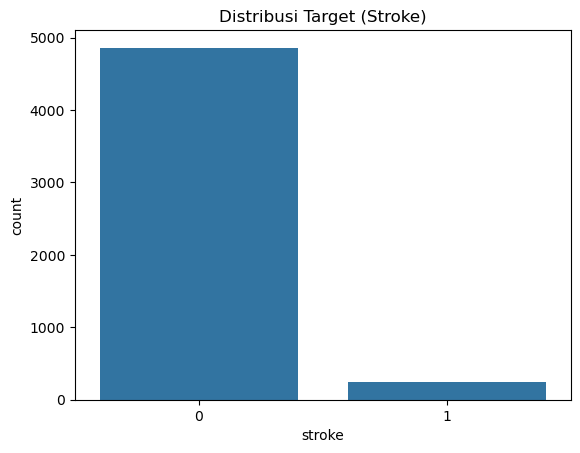

In [6]:
sns.countplot(data=df, x='stroke')
plt.title("Distribusi Target (Stroke)")


In [10]:
X = df.drop(columns=['stroke'])
y = df['stroke']

In [11]:
from sklearn.preprocessing import LabelEncoder

# Inisialisasi encoder
le = LabelEncoder()

# Encode label kategori
X['gender'] = le.fit_transform(X['gender'])  # Female=0, Male=1, Other=2
X['ever_married'] = le.fit_transform(X['ever_married'])
X['Residence_type'] = le.fit_transform(X['Residence_type'])
X['smoking_status'] = le.fit_transform(X['smoking_status'])
X['work_type'] = le.fit_transform(X['work_type'])  # Jika belum one-hot

In [12]:
from imblearn.over_sampling import SMOTE
from sklearn.model_selection import train_test_split

# Bagi data
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, stratify=y, random_state=42)

# Terapkan SMOTE
smote = SMOTE(random_state=42)
X_train_res, y_train_res = smote.fit_resample(X_train, y_train)

# Cek hasil
print("Sebelum SMOTE:", y_train.value_counts())
print("Setelah SMOTE:", y_train_res.value_counts())

Sebelum SMOTE: stroke
0    3889
1     199
Name: count, dtype: int64
Setelah SMOTE: stroke
0    3889
1    3889
Name: count, dtype: int64


In [17]:
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import classification_report, confusion_matrix, accuracy_score
from sklearn.model_selection import train_test_split
from imblearn.over_sampling import SMOTE
import pandas as pd


logreg = LogisticRegression(max_iter=1000)
logreg.fit(X_train_res, y_train_res)
y_pred_logreg = logreg.predict(X_test)
print("\n=== Logistic Regression ===")
print("Confusion Matrix:\n", confusion_matrix(y_test, y_pred_logreg))
print("Classification Report:\n", classification_report(y_test, y_pred_logreg))
print("Akurasi:", accuracy_score(y_test, y_pred_logreg))



=== Logistic Regression ===
Confusion Matrix:
 [[678 294]
 [ 15  35]]
Classification Report:
               precision    recall  f1-score   support

           0       0.98      0.70      0.81       972
           1       0.11      0.70      0.18        50

    accuracy                           0.70      1022
   macro avg       0.54      0.70      0.50      1022
weighted avg       0.94      0.70      0.78      1022

Akurasi: 0.6976516634050881


In [19]:
rf = RandomForestClassifier(random_state=42)
rf.fit(X_train_res, y_train_res)
y_pred_rf = rf.predict(X_test)

print("\n=== Random Forest ===")
print("Confusion Matrix:\n", confusion_matrix(y_test, y_pred_rf))
print("Classification Report:\n", classification_report(y_test, y_pred_rf))
print("Akurasi:", accuracy_score(y_test, y_pred_rf))


=== Random Forest ===
Confusion Matrix:
 [[883  89]
 [ 36  14]]
Classification Report:
               precision    recall  f1-score   support

           0       0.96      0.91      0.93       972
           1       0.14      0.28      0.18        50

    accuracy                           0.88      1022
   macro avg       0.55      0.59      0.56      1022
weighted avg       0.92      0.88      0.90      1022

Akurasi: 0.8776908023483366


ROC AUC Score: 0.7792386831275722


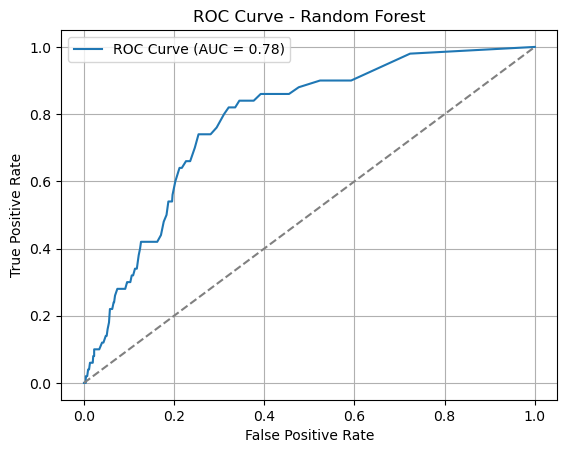

In [20]:
from sklearn.metrics import roc_auc_score, roc_curve
import matplotlib.pyplot as plt

# Probabilitas prediksi
y_proba = rf.predict_proba(X_test)[:,1]

# Hitung ROC AUC
roc_auc = roc_auc_score(y_test, y_proba)
print("ROC AUC Score:", roc_auc)

# Plot ROC Curve
fpr, tpr, _ = roc_curve(y_test, y_proba)
plt.figure()
plt.plot(fpr, tpr, label=f'ROC Curve (AUC = {roc_auc:.2f})')
plt.plot([0,1], [0,1], linestyle='--', color='gray')
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('ROC Curve - Random Forest')
plt.legend()
plt.grid(True)
plt.show()

In [ ]:
import joblib

# Simpan model
joblib.dump(rf, 'random_forest_stroke_model.pkl')

# Simpan encoder jika perlu (opsional)
joblib.dump(le, 'label_encoder.pkl')